# Now the Dataset is cleaned now we will further do Outlier Detection

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.read_csv('wines_SPA_cleaned.csv')
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013.0,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018.0,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009.0,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999.0,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996.0,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


**Its clear that only 4 columns which have NaN values which are year, type, body and acidity**

In [95]:
df.shape

(2048, 10)

In [96]:
df.describe()

,year,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,2011.188965,4.401123,573.994629,135.242194,4.245573,2.924576
std,11.049577,0.147023,1376.153171,272.178316,0.609041,0.311889
min,1910.000000,4.200000,25.000000,4.990000,2.000000,1.000000
25%,2010.000000,4.300000,58.000000,31.917947,4.000000,3.000000
50%,2015.000000,4.400000,141.000000,53.625000,4.000000,3.000000
75%,2017.000000,4.500000,485.500000,110.000000,5.000000,3.000000
max,2021.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000


**Making an array of Numerical Columns that will be used in future**

In [97]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['year', 'rating', 'num_reviews', 'price', 'body', 'acidity'], dtype='object')

**Making a function to get box_plot of features so that what method to use for outlier detection will be easier**

In [98]:
def box_plot(df):
    for i in numerical_columns:
        plt.figure(figsize=(10, 6))
        sn.boxplot(x=df[i])
        plt.title(f'Box Plot of {i}')
        plt.show()

**Same function for histogram to visualize the plots**

In [99]:
def histogram_plot(df):
  for i in numerical_columns:
    plt.figure(figsize=(10, 6))
    df[i].hist()
    plt.title(f'Histogram of {i}')
    plt.show()

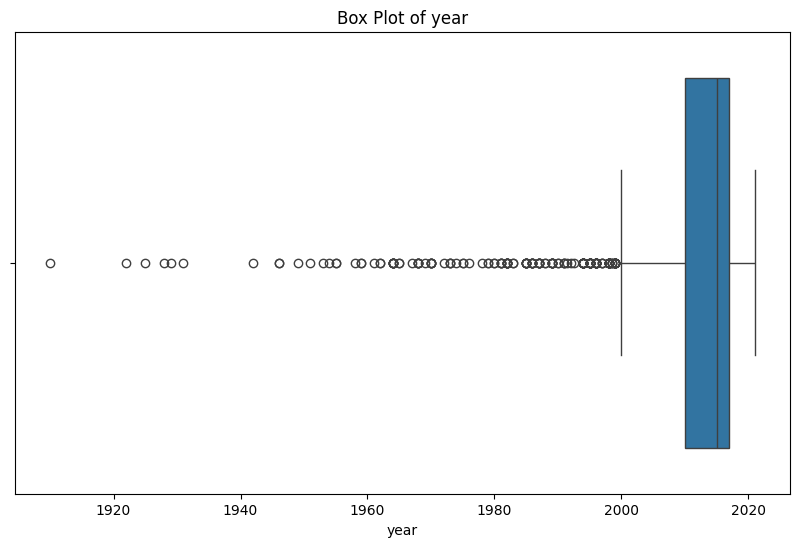

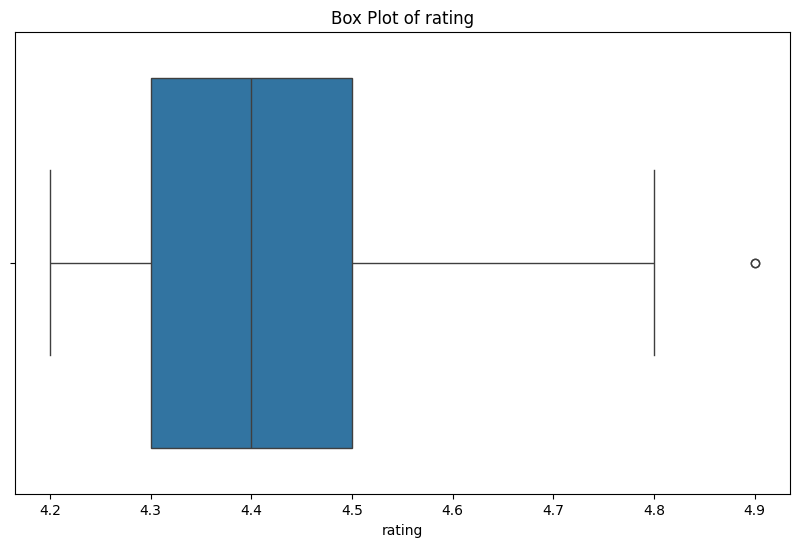

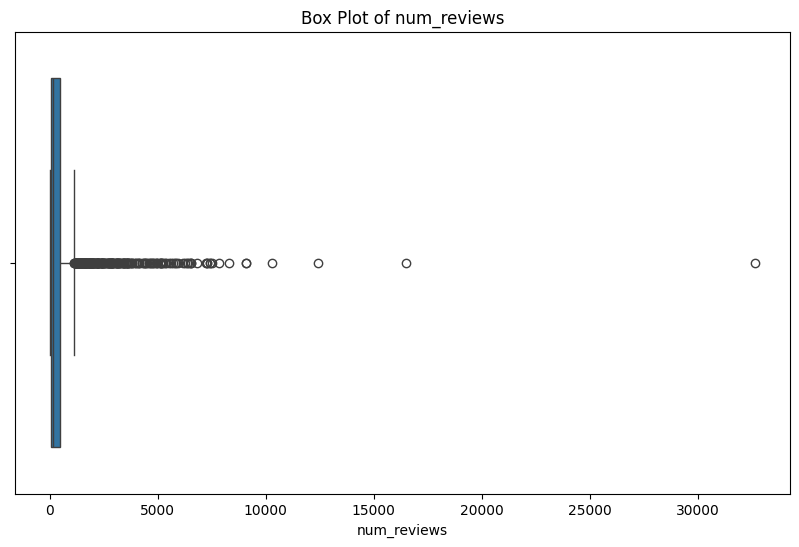

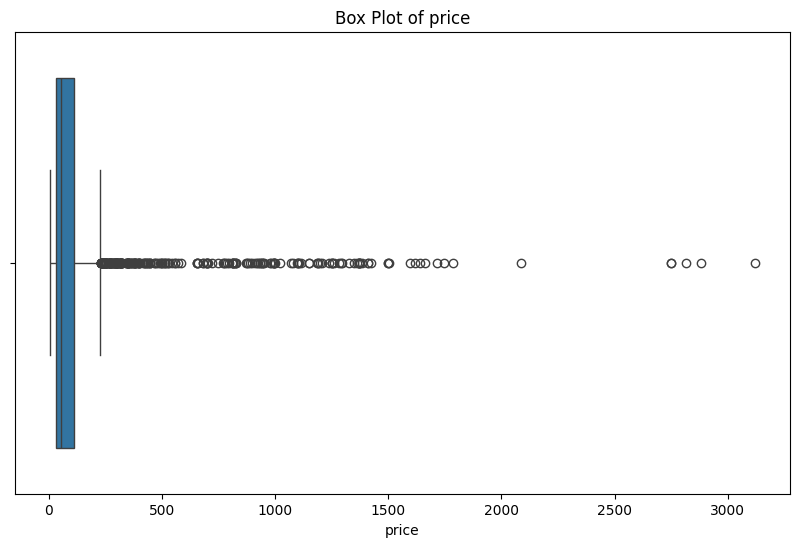

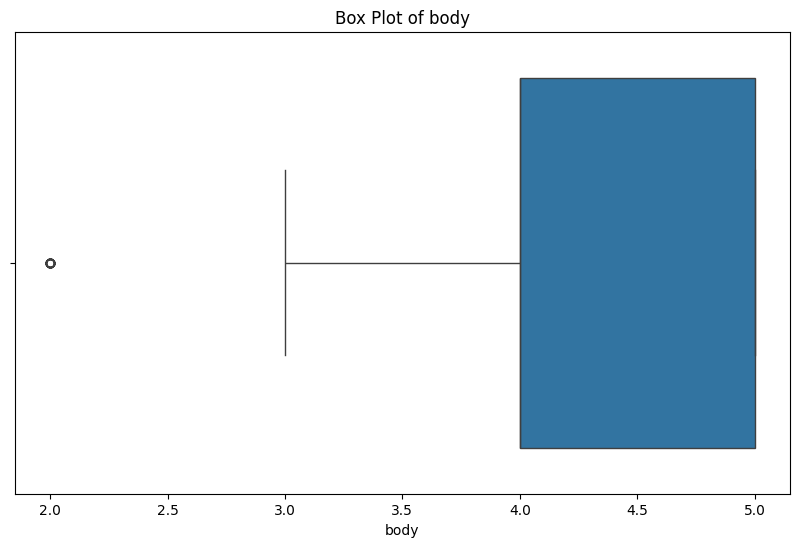

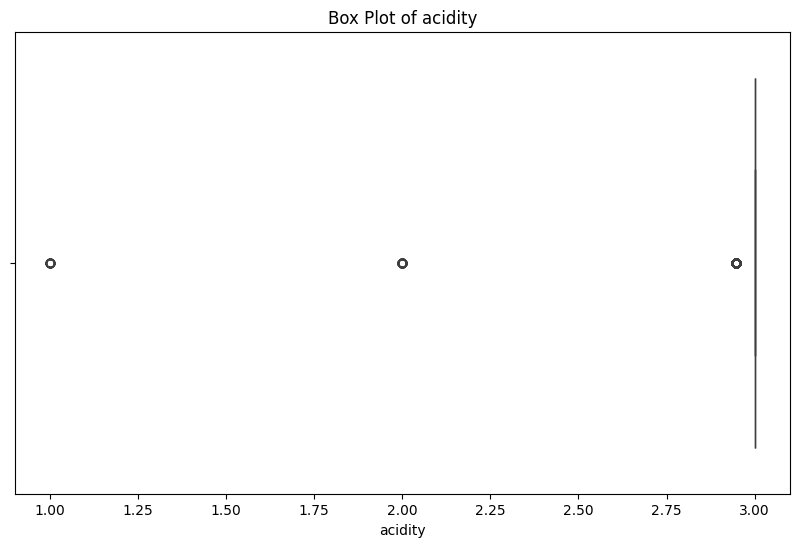

In [100]:
box_plot(df)

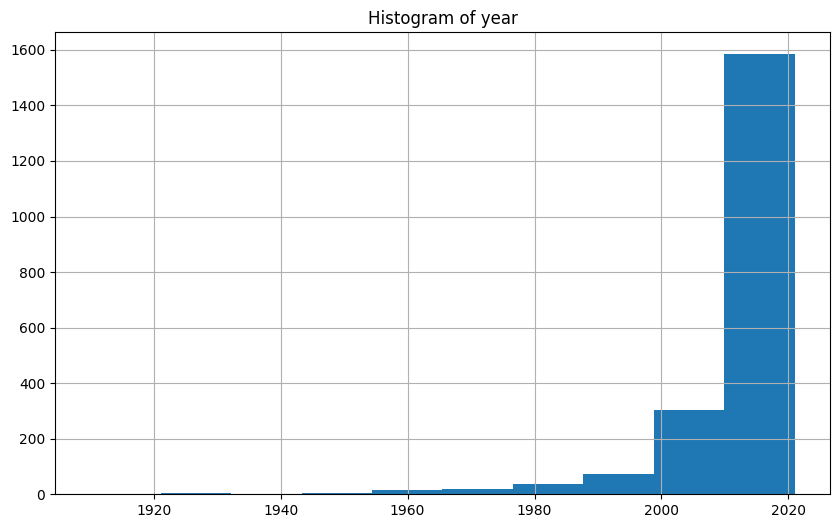

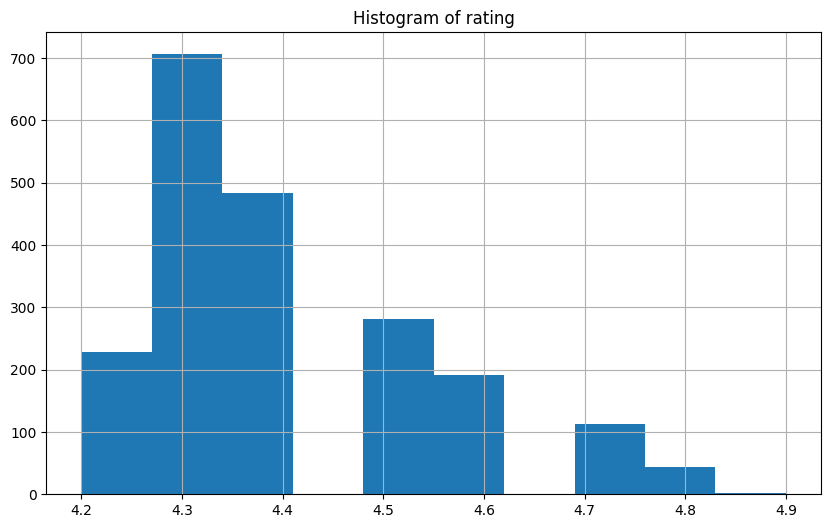

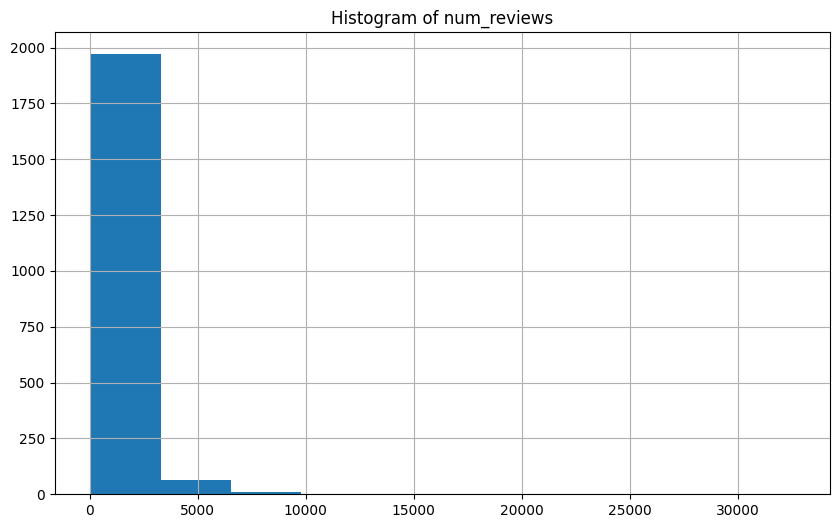

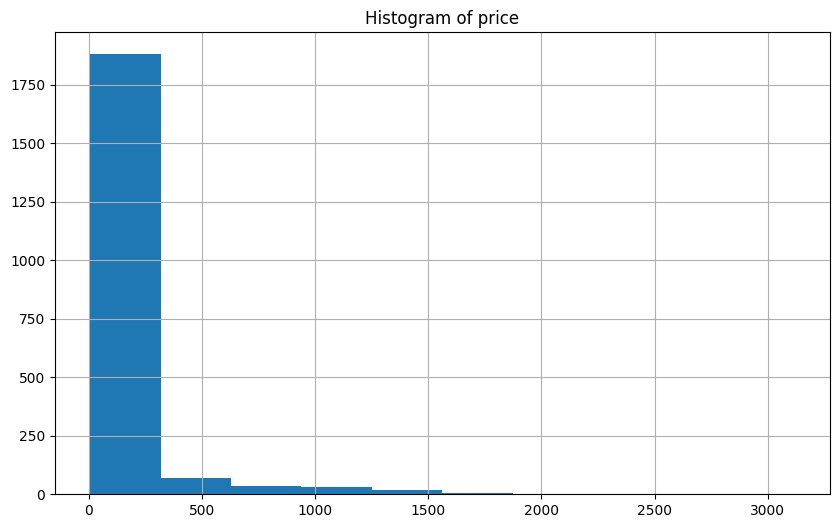

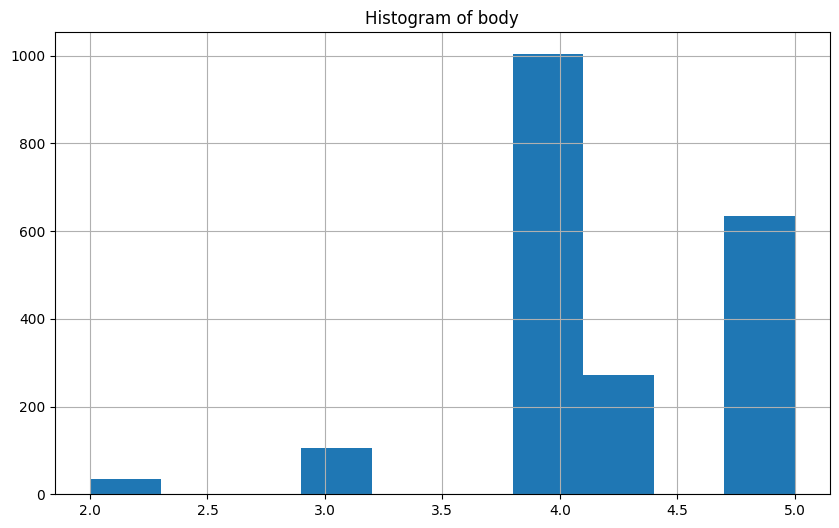

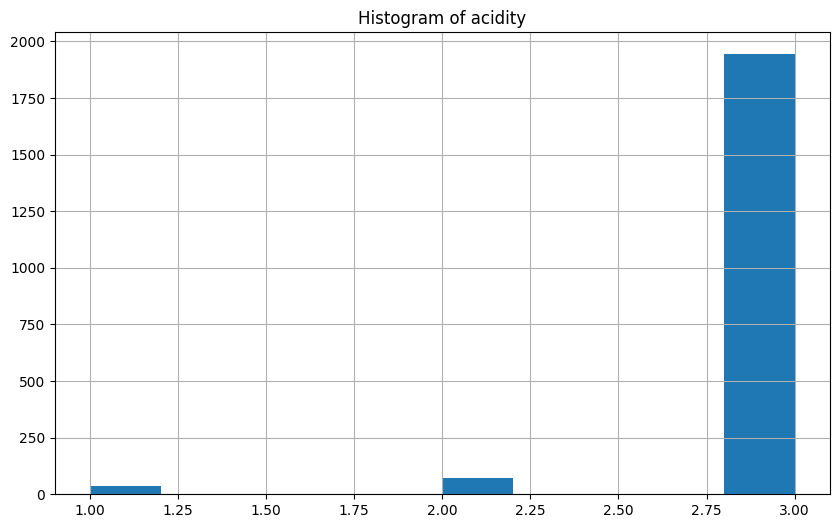

In [101]:
histogram_plot(df)

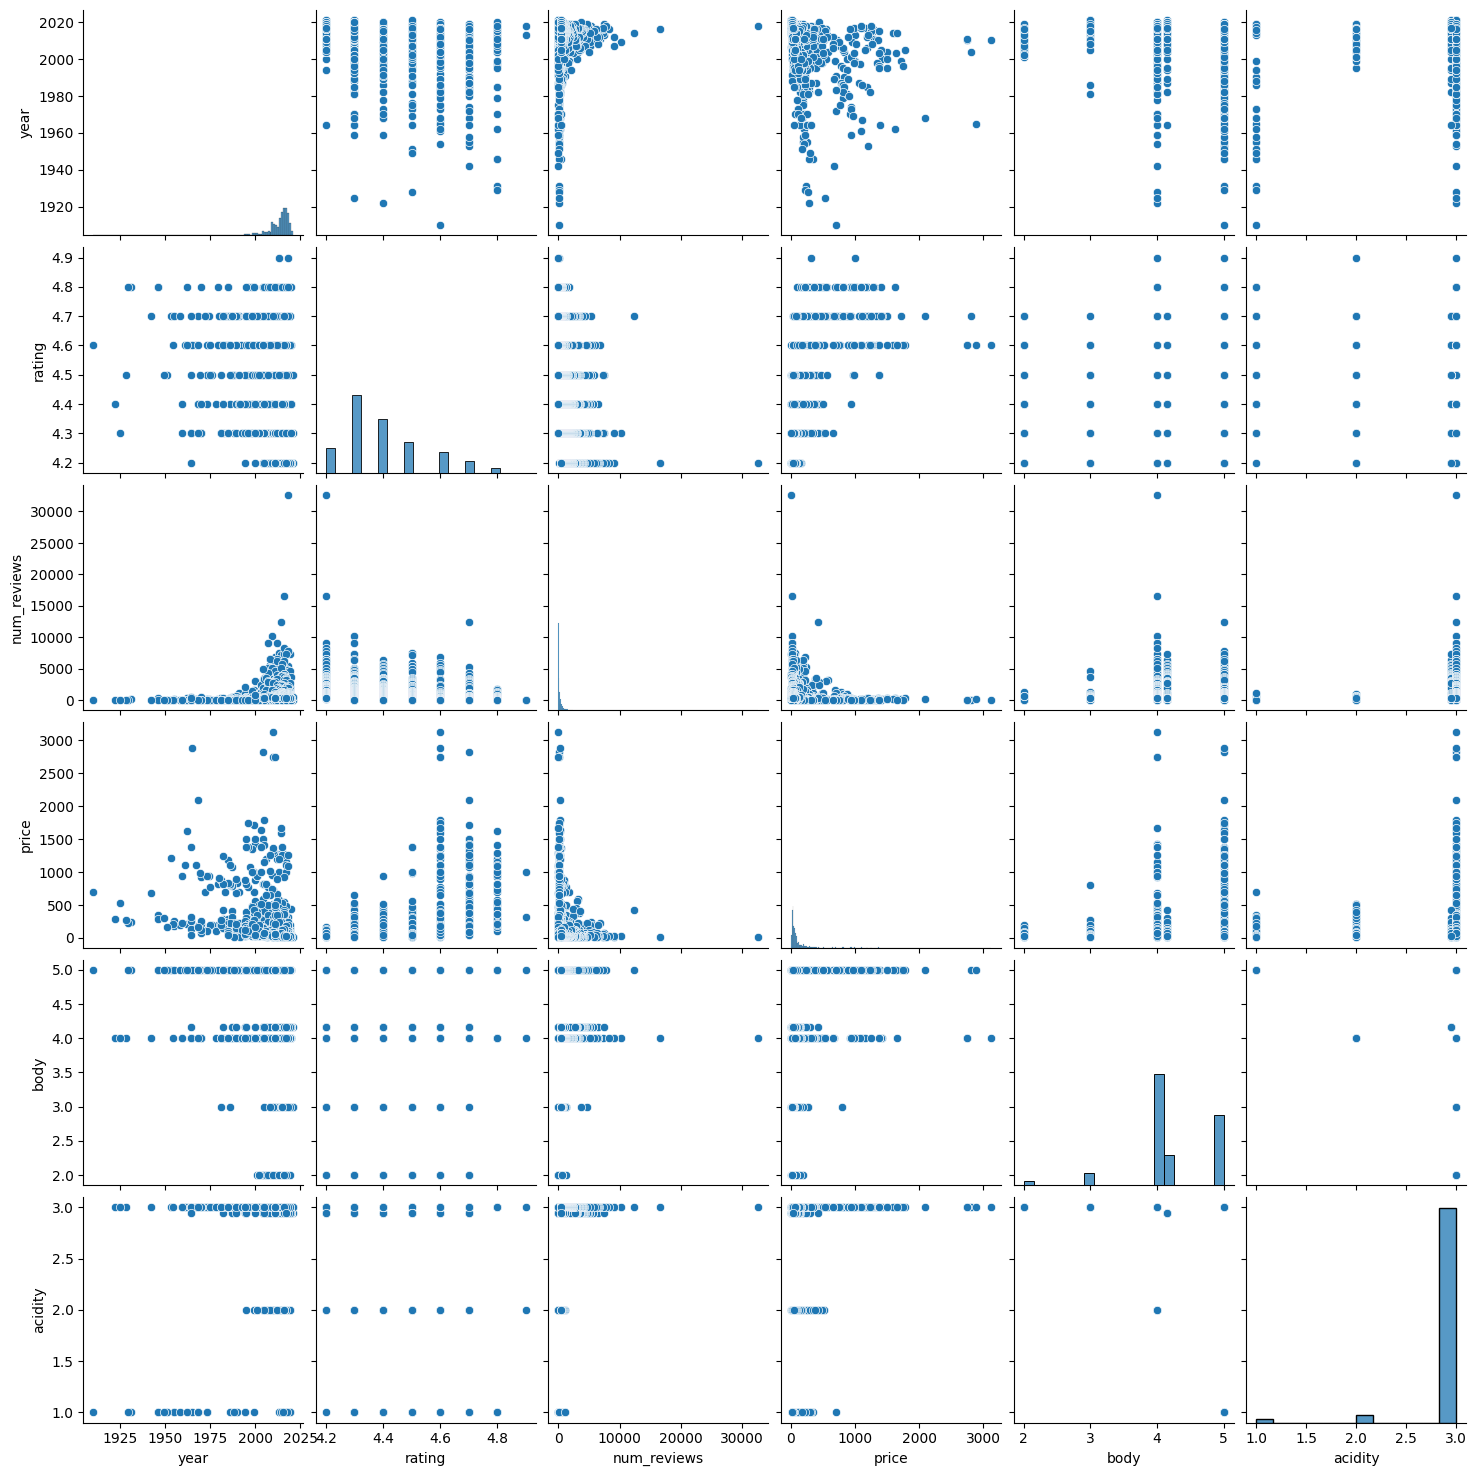

In [102]:
sn.pairplot(df)
plt.show()

**From seeing the above plots we have clear intutuion to use Quantile to remove the outliers**

In [103]:
df.describe()

,year,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,2011.188965,4.401123,573.994629,135.242194,4.245573,2.924576
std,11.049577,0.147023,1376.153171,272.178316,0.609041,0.311889
min,1910.000000,4.200000,25.000000,4.990000,2.000000,1.000000
25%,2010.000000,4.300000,58.000000,31.917947,4.000000,3.000000
50%,2015.000000,4.400000,141.000000,53.625000,4.000000,3.000000
75%,2017.000000,4.500000,485.500000,110.000000,5.000000,3.000000
max,2021.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [104]:
min_threshold, max_threshold = df['price'].quantile([0.2, 0.8])
min_threshold, max_threshold

(27.9, 140.0)

In [106]:
df = df[(df['price'] > min_threshold) & (df['price'] < max_threshold)]
df.shape

(1221, 10)

**Now we will make a new dataset which will be outliers free**

In [107]:
df.to_csv('wines_SPA_outliers_free.csv', index=False)

<font color="green">**Outliers Removed**</font>